uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving q1 (1).xlsx to q1 (1).xlsx


# Data Cleaning

In [ ]:
import pandas as pd
file_path = 'q1 (1).xlsx'
data = pd.ExcelFile(file_path)
df = data.parse('New Sheet')
df.head()

,Bill to Account Number,Invoice Date,Invoice Number,Store ID,Original Amount Due,Current Balance,Payor,Ground Tracking ID Prefix,Express or Ground Tracking ID,Transportation Charge Amount,...,Tracking ID Charge Description.1,Tracking ID Charge Amount.1,Tracking ID Charge Description.2,Tracking ID Charge Amount.2,Tracking ID Charge Description.3,Tracking ID Charge Amount.3,Tracking ID Charge Description.4,Tracking ID Charge Amount.4,Tracking ID Charge Description.5,Tracking ID Charge Amount.5
0,NaN,20240305,NaN,NaN,3425.68,0,Shipper,NaN,271426000374,24.13,...,Residential,5.55,Performance Pricing,-11.10,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,20240305,NaN,NaN,3425.68,0,Shipper,NaN,271426004623,23.06,...,Residential,5.55,Performance Pricing,-10.61,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,20240305,NaN,NaN,3425.68,0,Shipper,NaN,271426004792,23.06,...,Residential,5.55,Performance Pricing,-10.61,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,20240305,NaN,NaN,3425.68,0,Shipper,NaN,271426009371,24.61,...,Residential,5.55,Performance Pricing,-11.32,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,20240305,NaN,NaN,3425.68,0,Shipper,NaN,271426010640,23.16,...,Residential,5.55,Performance Pricing,-10.65,NaN,NaN,NaN,NaN,NaN,NaN


Drop the duplicates

In [ ]:

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
df = df.drop_duplicates()

Number of duplicate rows: 0


Handle Missing Values

In [ ]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)
columns_to_drop = missing_percent[missing_percent > 50].index
df = df.drop(columns=columns_to_drop)
df.fillna(df.mean(numeric_only=True), inplace=True)

Bill to Account Number              100.000000
Invoice Date                          0.000000
Invoice Number                      100.000000
Store ID                            100.000000
Original Amount Due                   0.000000
                                       ...    
Tracking ID Charge Amount.3          79.689922
Tracking ID Charge Description.4     83.720930
Tracking ID Charge Amount.4          83.720930
Tracking ID Charge Description.5     57.751938
Tracking ID Charge Amount.5          57.751938
Length: 117, dtype: float64


Drop columns with only one unique value:

In [ ]:
single_value_columns = df.nunique()[df.nunique() <= 1].index
df = df.drop(columns=single_value_columns)

Standardize Column Data

In [ ]:
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')

if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].str.lower().str.strip()

Detect and Handle Outliers

In [ ]:
import numpy as np

numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

 Save the Cleaned Data

In [ ]:
df.to_excel('cleaned_data.xlsx', index=False)
from google.colab import files
files.download('cleaned_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



# EDA

In [ ]:

print(f"Dataset shape: {df.shape}")
print("Columns in the dataset:", df.columns.tolist())

df.info()

df.describe()

Dataset shape: (361, 26)
Columns in the dataset: ['Invoice Date', 'Original Amount Due', 'Express or Ground Tracking ID', 'Transportation Charge Amount', 'Net Charge Amount', 'Service Type', 'Ground Service', 'Shipment Date', 'POD Delivery Date', 'Actual Weight Amount', 'Rated Weight Amount', 'Dim Length', 'Dim Width', 'Dim Height', 'Dim Divisor', 'Recipient Zip Code', 'Original Recipient Address Line 1', 'Original Recipient City', 'Original Recipient State', 'Original Recipient Zip Code', 'Zone Code', 'Currency Conversion Date', 'Tendered Date', 'Tracking ID Charge Amount', 'Tracking ID Charge Amount.1', 'Tracking ID Charge Amount.2']
<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 201 to 954
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Invoice Date                       361 non-null    int64  
 1   Original Amount Due                361 non-null    float6

,Invoice Date,Original Amount Due,Express or Ground Tracking ID,Transportation Charge Amount,Net Charge Amount,Shipment Date,POD Delivery Date,Actual Weight Amount,Rated Weight Amount,Dim Length,...,Dim Height,Dim Divisor,Recipient Zip Code,Original Recipient Zip Code,Zone Code,Currency Conversion Date,Tendered Date,Tracking ID Charge Amount,Tracking ID Charge Amount.1,Tracking ID Charge Amount.2
count,3.610000e+02,361.000000,3.610000e+02,361.000000,361.000000,3.610000e+02,3.610000e+02,361.000000,361.000000,361.000000,...,361.0,361.000000,3.610000e+02,361.0,361.000000,3.610000e+02,3.610000e+02,361.000000,3.610000e+02,361.000000
mean,2.024032e+07,6573.942521,2.719556e+11,28.505374,24.319778,2.024031e+07,2.024031e+07,22.170637,23.839335,19.002770,...,12.0,206.966759,4.378673e+08,19144.0,4.927978,2.024031e+07,2.024031e+07,2.805734,5.550000e+00,-11.156094
std,5.581214e+00,2519.943767,2.463250e+08,9.314961,5.701605,5.625945e+00,5.702684e+00,6.467223,4.627419,0.052632,...,0.0,15.312812,3.011568e+08,0.0,1.943742,5.625945e+00,5.625945e+00,0.845928,3.112939e-14,3.747124
min,2.024030e+07,3425.680000,2.715778e+11,16.520000,15.080000,2.024030e+07,2.024030e+07,8.800000,17.000000,19.000000,...,12.0,194.000000,2.554000e+03,19144.0,2.000000,2.024030e+07,2.024030e+07,1.500000,5.550000e+00,-21.440000
25%,2.024031e+07,4567.370000,2.717083e+11,21.390000,19.210000,2.024030e+07,2.024031e+07,17.000000,19.000000,19.000000,...,12.0,194.000000,2.175490e+08,19144.0,4.000000,2.024030e+07,2.024030e+07,2.130000,5.550000e+00,-13.280000
50%,2.024032e+07,5632.730000,2.719137e+11,25.640000,24.400000,2.024031e+07,2.024031e+07,24.100000,25.000000,19.000000,...,12.0,194.000000,3.390818e+08,19144.0,5.000000,2.024031e+07,2.024031e+07,2.770000,5.550000e+00,-10.560000
75%,2.024033e+07,10484.440000,2.721645e+11,32.730000,28.340000,2.024032e+07,2.024032e+07,27.400000,28.000000,19.000000,...,12.0,225.000000,7.126946e+08,19144.0,6.000000,2.024032e+07,2.024032e+07,3.330000,5.550000e+00,-8.270000
max,2.024033e+07,10484.440000,2.724527e+11,56.530000,40.300000,2.024032e+07,2.024032e+07,34.700000,35.000000,20.000000,...,12.0,225.000000,9.827162e+08,19144.0,8.000000,2.024032e+07,2.024032e+07,5.190000,5.550000e+00,-5.820000


Histograms- visualize the distribution of numerical data.

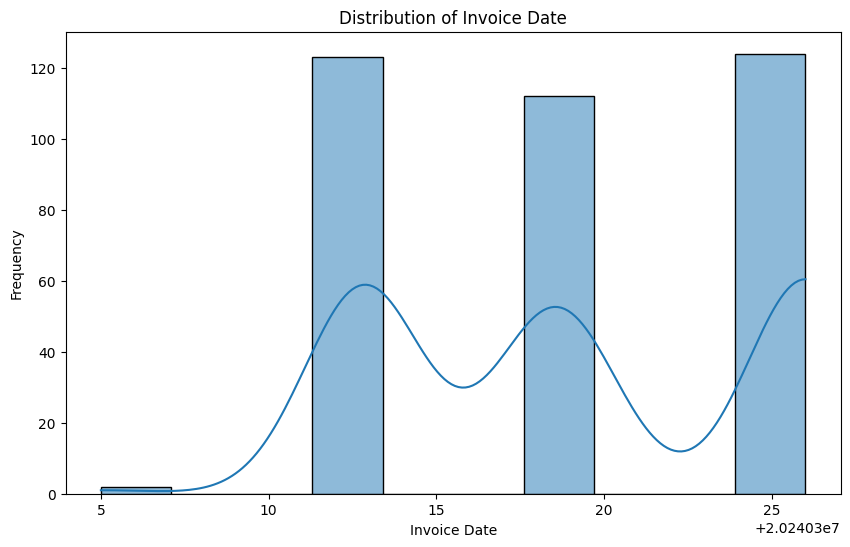

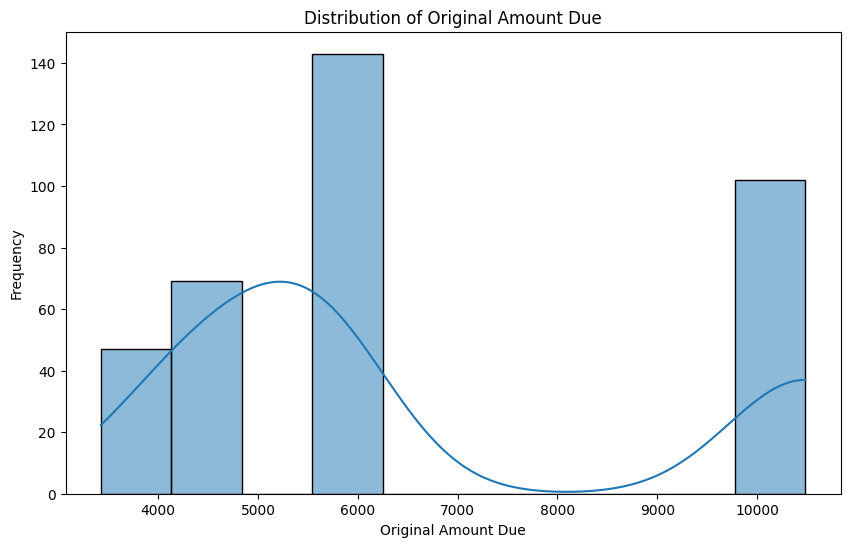

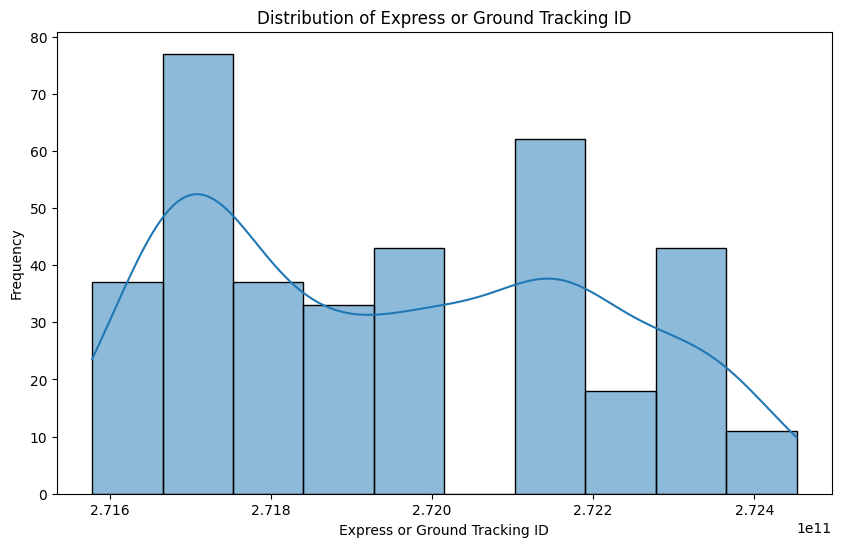

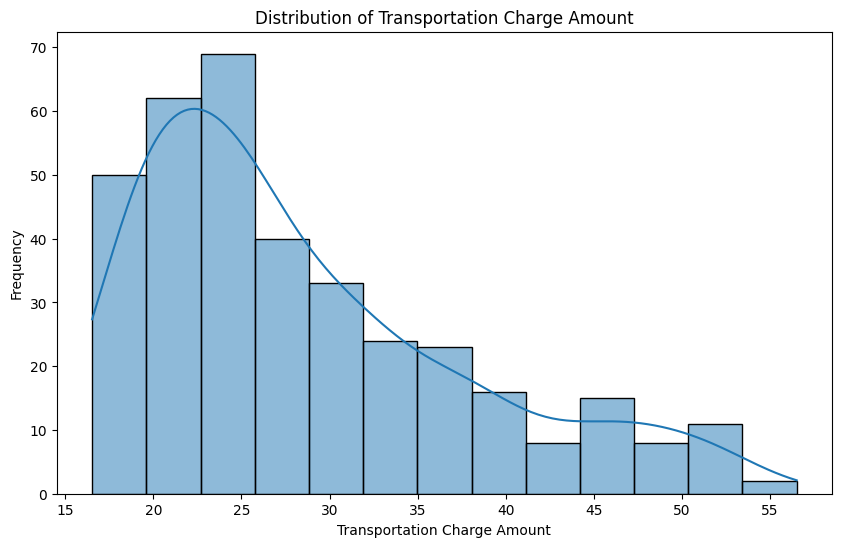

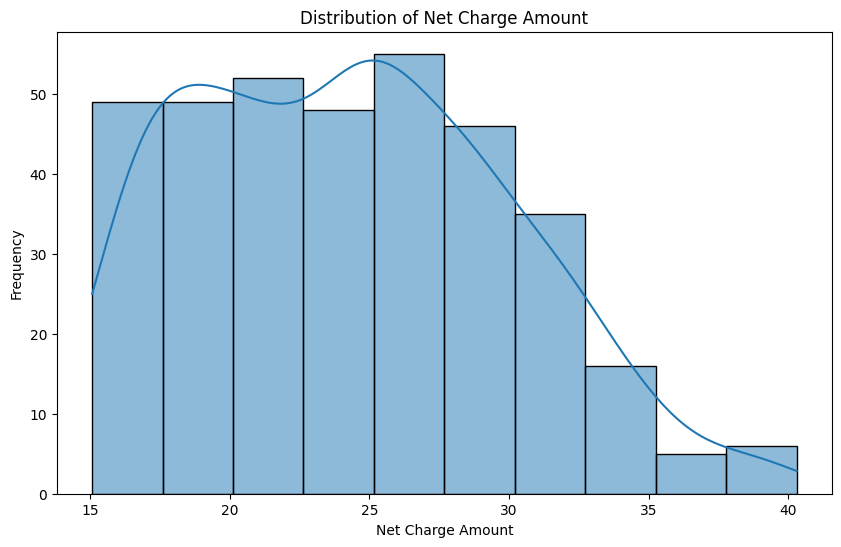

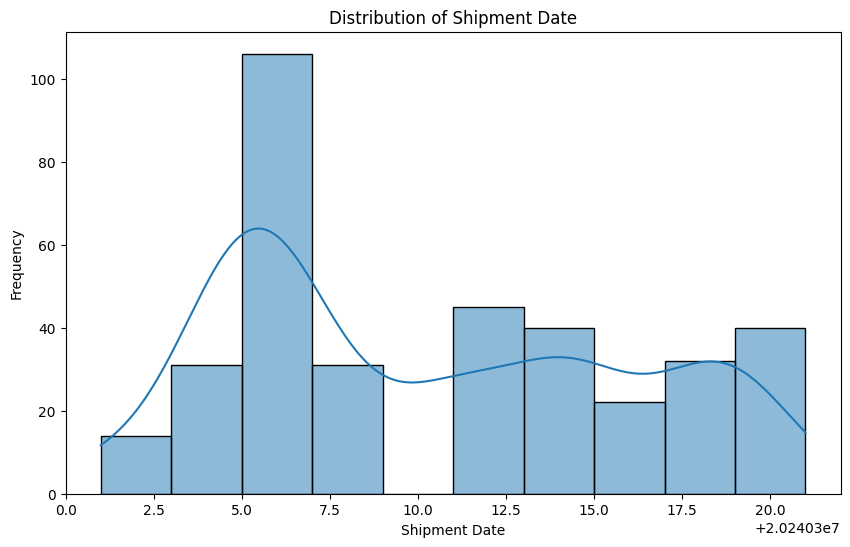

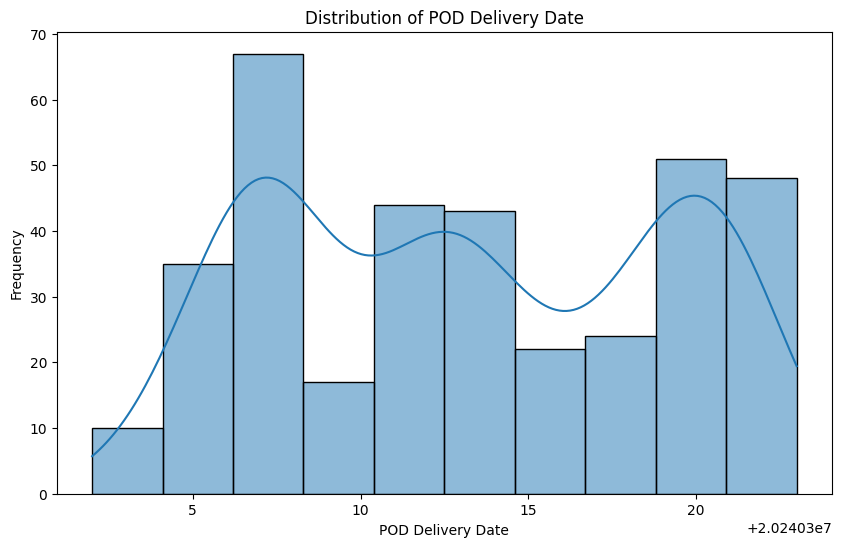

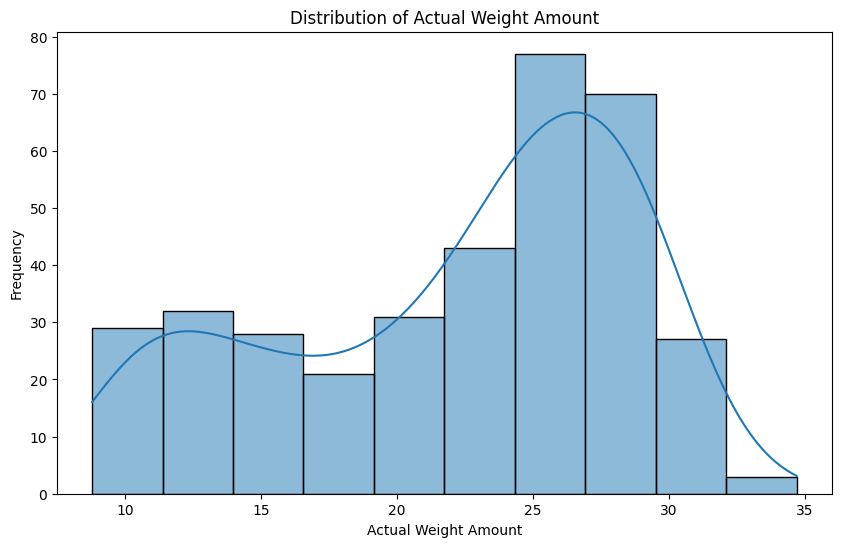

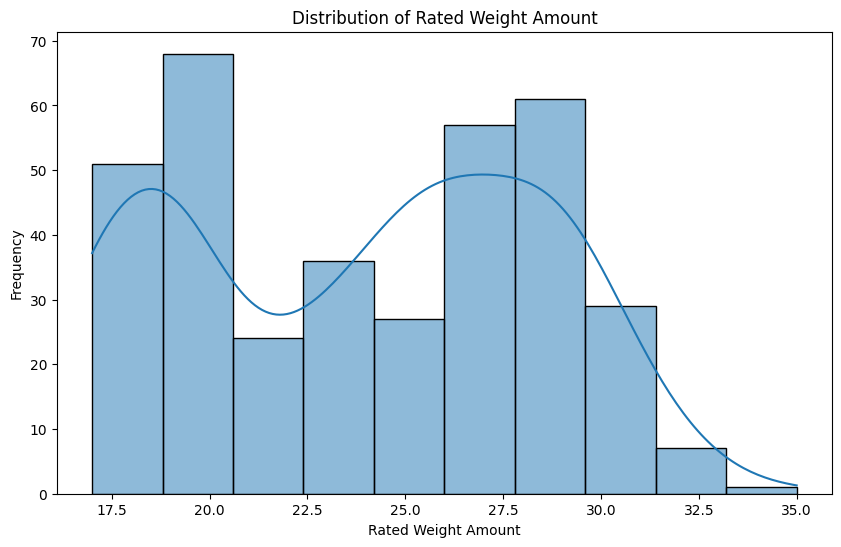

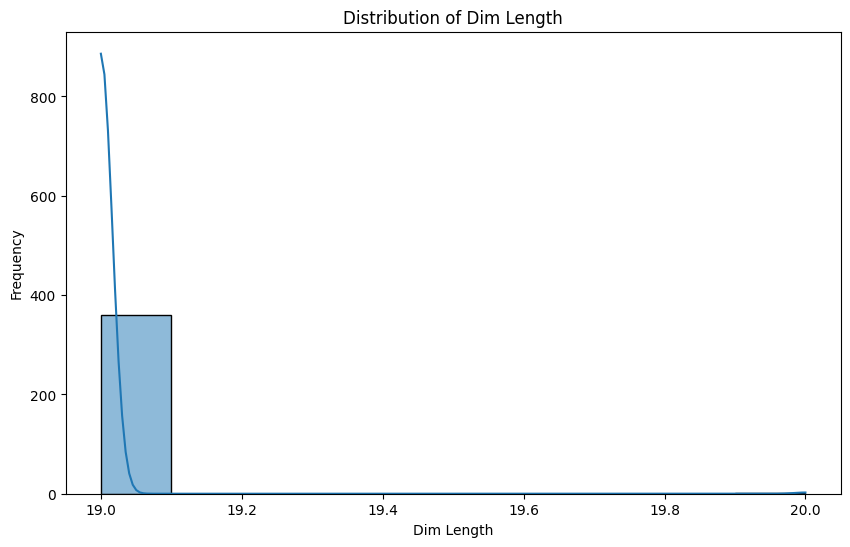

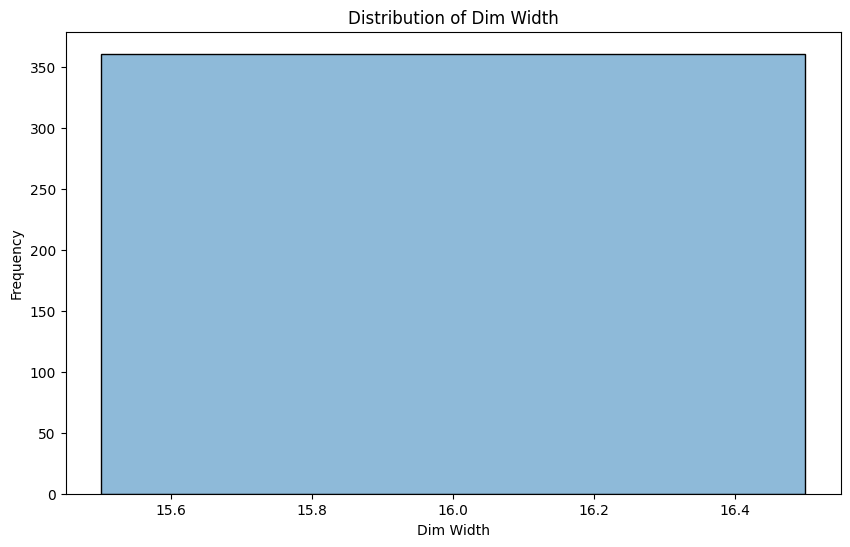

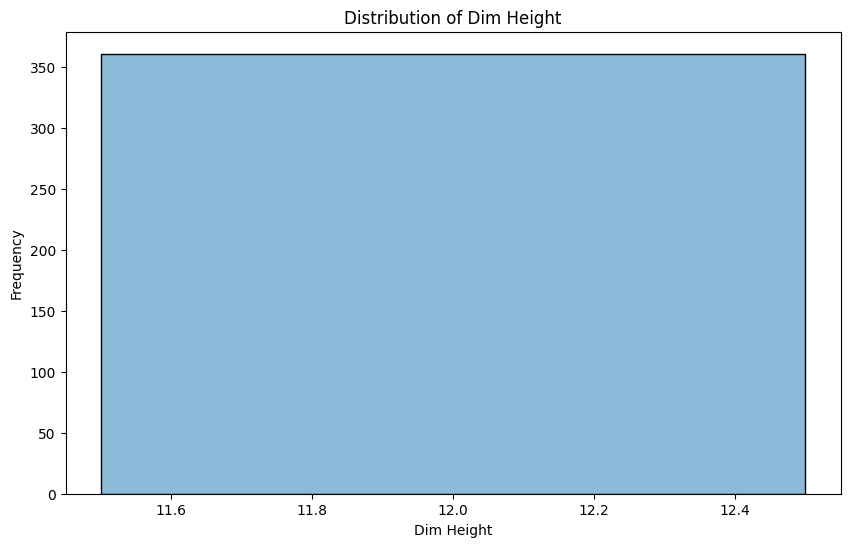

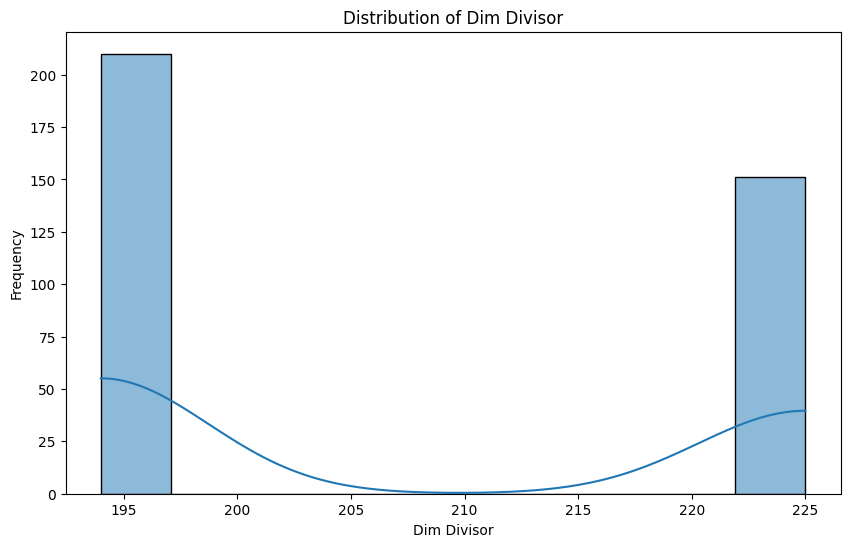

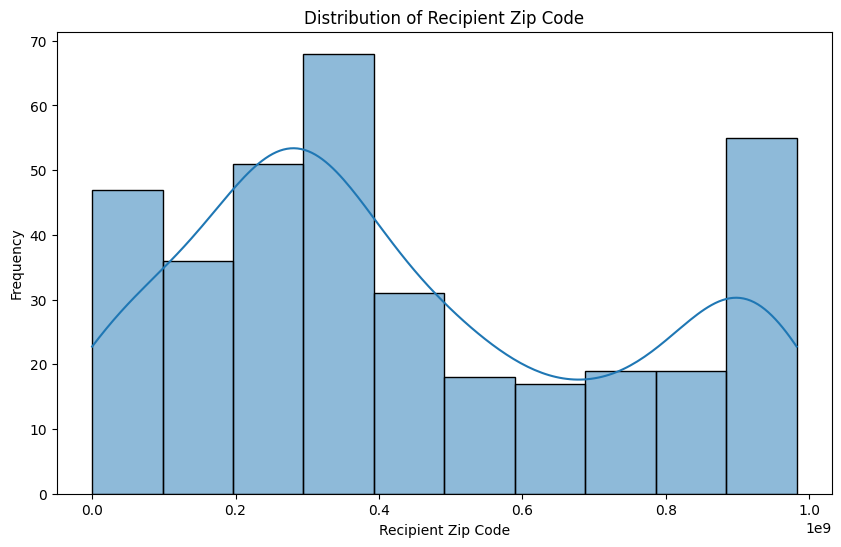

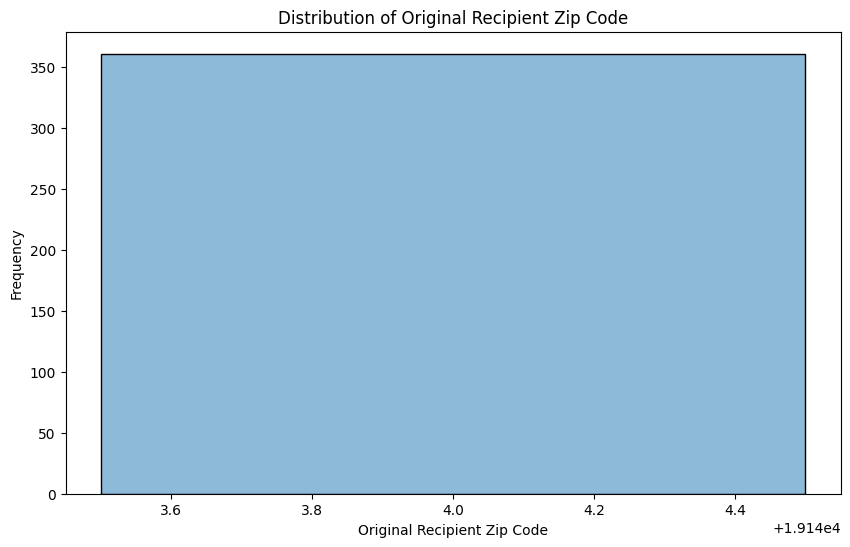

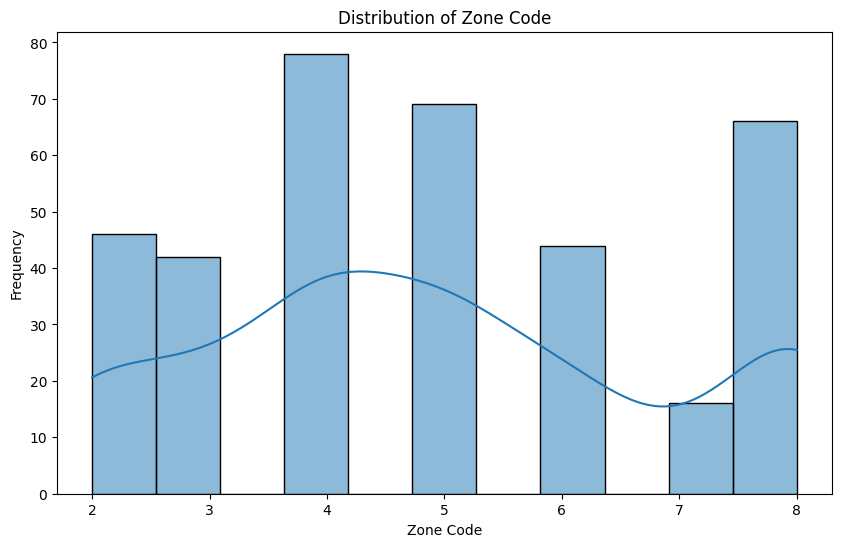

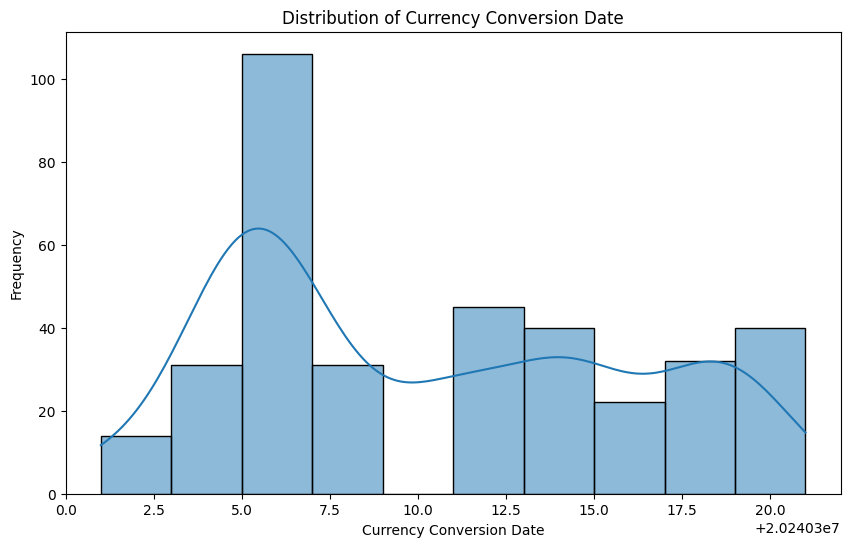

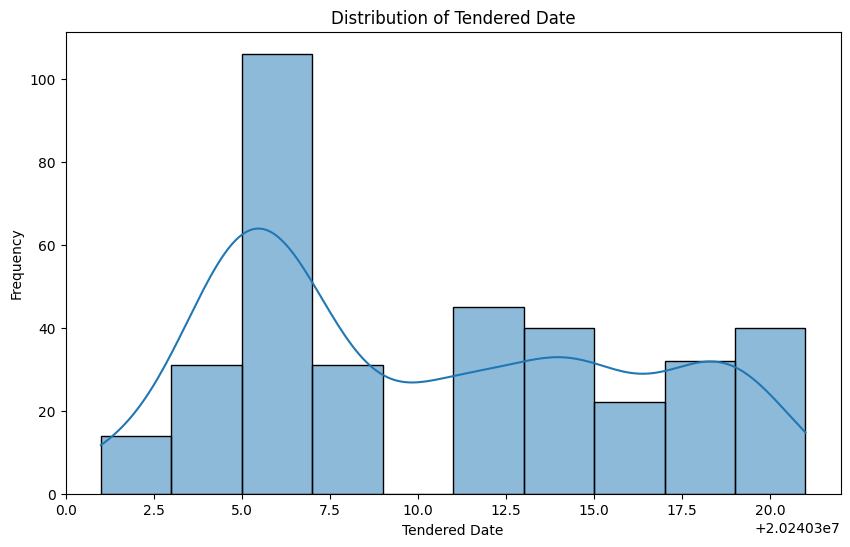

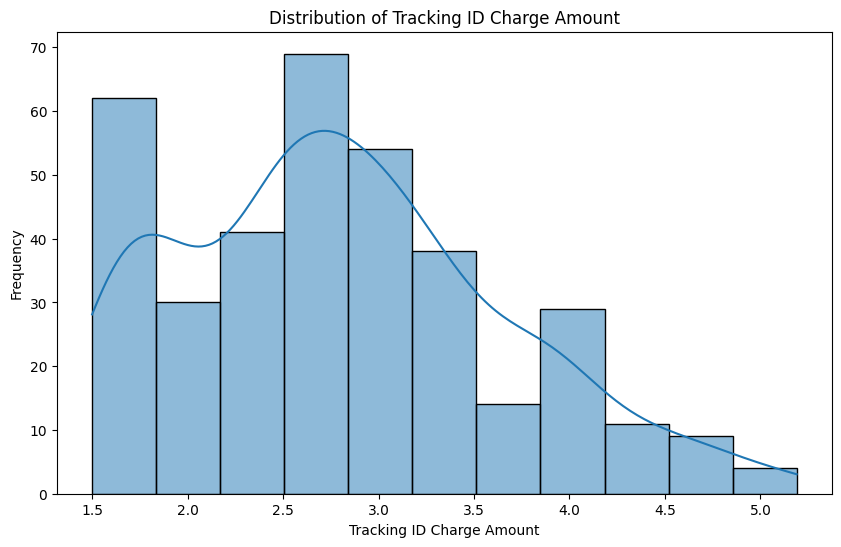

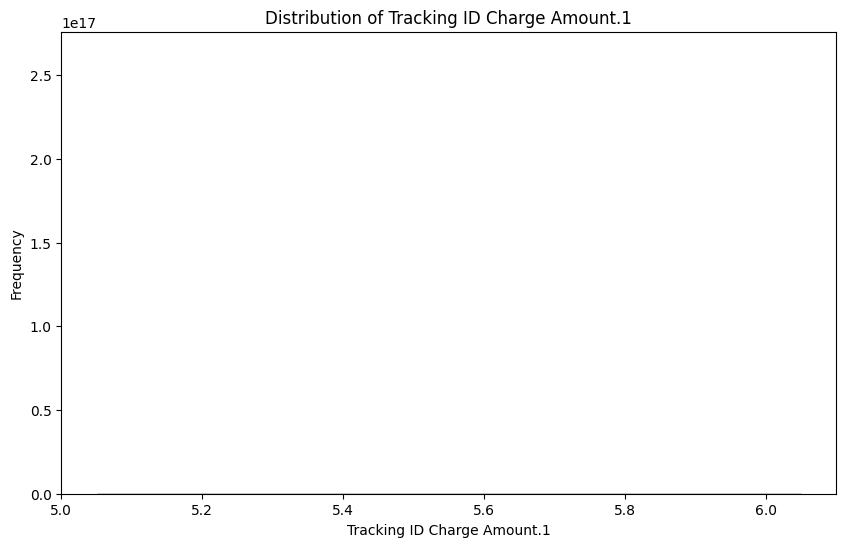

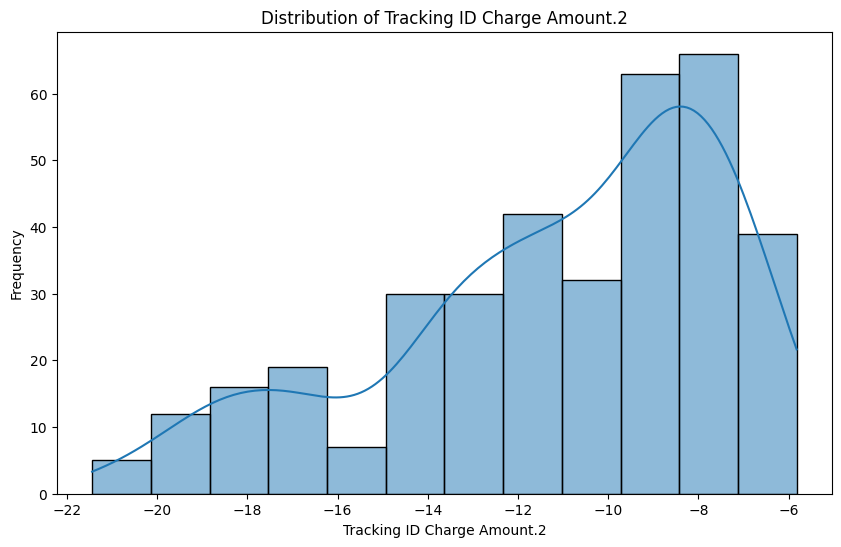

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Bar charts - visualize the distribution of categorical variables.

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Service Type', 'Ground Service', 'Original Recipient Address Line 1',
       'Original Recipient City', 'Original Recipient State'],
      dtype='object')


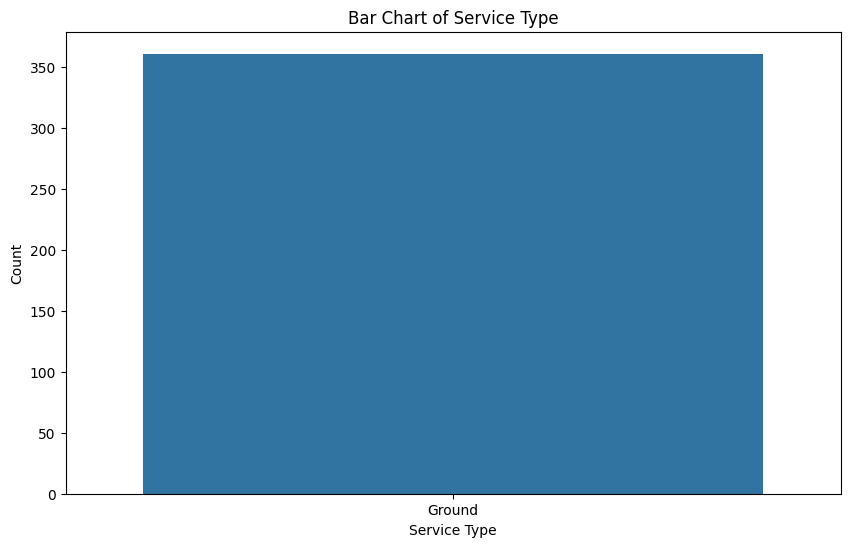

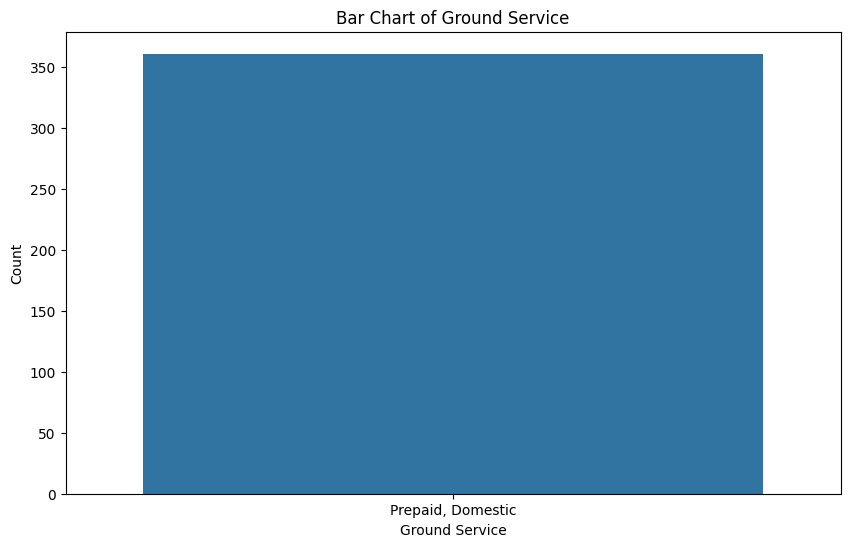

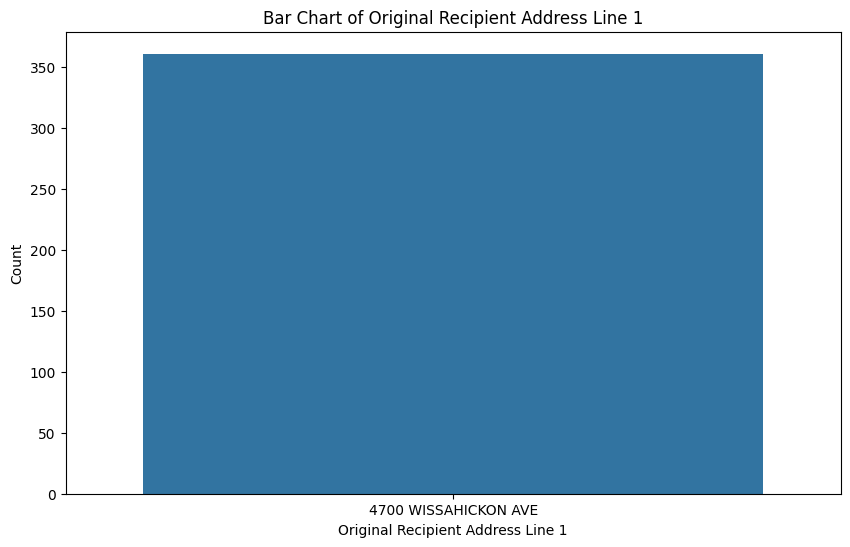

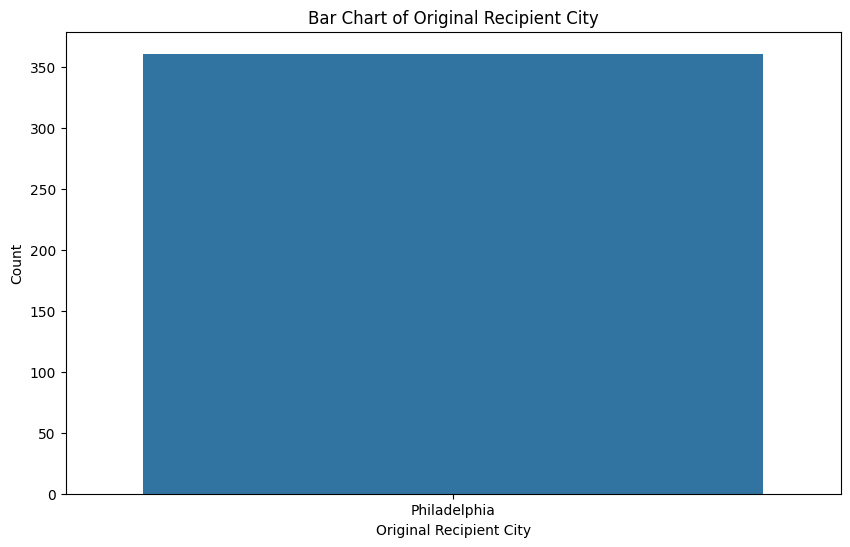

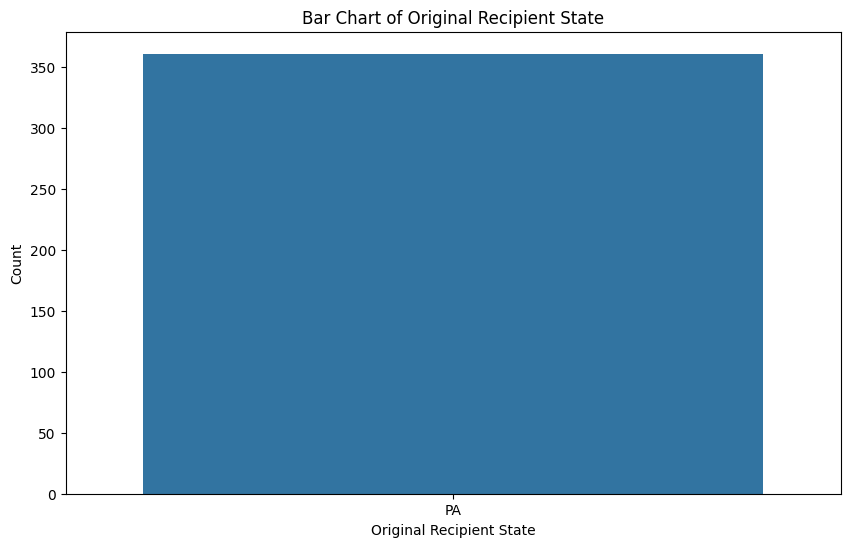

In [ ]:

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


Scatter plot -relationships between two numerical features.

In [ ]:
for col1 in numerical_columns:
    for col2 in numerical_columns:
        if col1 != col2:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.title(f'Scatter Plot between {col1} and {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()


Correlation Matrix

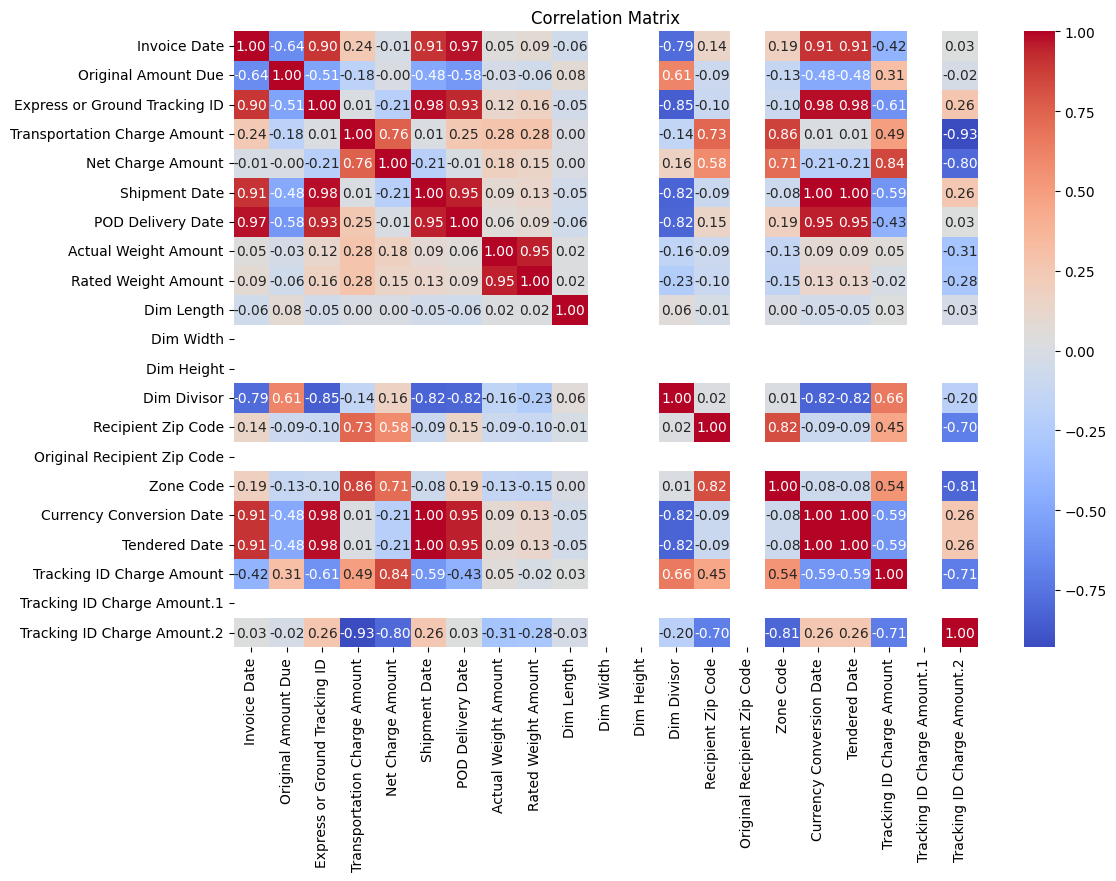

In [ ]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df.to_excel('eda_data.xlsx', index=False)
from google.colab import files
files.download('eda_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Transformation

Feature Engineering

dates


In [ ]:
date_columns = ['Invoice Date', 'Shipment Date', 'POD Delivery Date', 'Currency Conversion Date', 'Tendered Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y%m%d')

for col in date_columns:
    df[f'{col}_Year'] = df[col].dt.year
    df[f'{col}_Month'] = df[col].dt.month
    df[f'{col}_Day'] = df[col].dt.day
    df[f'{col}_DayOfWeek'] = df[col].dt.dayofweek

calculate volumetric weight

In [ ]:
df['Volumetric_Weight'] = (df['Dim Length'] * df['Dim Width'] * df['Dim Height']) / df['Dim Divisor']

Create ratios to understand relationships between different charges

In [ ]:
df['Transportation_to_Net_Charge'] = df['Transportation Charge Amount'] / df['Net Charge Amount']
df['TrackingID_Charge_Ratio'] = df['Tracking ID Charge Amount'] / df['Net Charge Amount']


Length of address

In [ ]:
df['Address_Length'] = df['Original Recipient Address Line 1'].apply(len)


Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Service Type', 'Ground Service', 'Original Recipient State']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = ['Original Amount Due', 'Transportation Charge Amount', 'Net Charge Amount',
                     'Actual Weight Amount', 'Rated Weight Amount', 'Dim Length', 'Dim Width',
                     'Dim Height', 'Volumetric_Weight']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


Removing Duplicate Columns

In [ ]:
df = df.drop(columns=['Tracking ID Charge Amount.1', 'Tracking ID Charge Amount.2'])


In [ ]:
print(f"Final Dataset Shape: {df.shape}")
print(f"Columns in the Dataset: {df.columns.tolist()}")


Final Dataset Shape: (361, 51)
Columns in the Dataset: ['Invoice Date', 'Original Amount Due', 'Express or Ground Tracking ID', 'Transportation Charge Amount', 'Net Charge Amount', 'Service Type', 'Ground Service', 'Shipment Date', 'POD Delivery Date', 'Actual Weight Amount', 'Rated Weight Amount', 'Dim Length', 'Dim Width', 'Dim Height', 'Dim Divisor', 'Recipient Zip Code', 'Original Recipient Address Line 1', 'Original Recipient City', 'Original Recipient State', 'Original Recipient Zip Code', 'Zone Code', 'Currency Conversion Date', 'Tendered Date', 'Tracking ID Charge Amount', 'year', 'month', 'day', 'Invoice Date_Year', 'Invoice Date_Month', 'Invoice Date_Day', 'Invoice Date_DayOfWeek', 'Shipment Date_Year', 'Shipment Date_Month', 'Shipment Date_Day', 'Shipment Date_DayOfWeek', 'POD Delivery Date_Year', 'POD Delivery Date_Month', 'POD Delivery Date_Day', 'POD Delivery Date_DayOfWeek', 'Currency Conversion Date_Year', 'Currency Conversion Date_Month', 'Currency Conversion Date_Day'

In [ ]:

low_variance_cols = [col for col in df.columns if df[col].nunique() == 1]

df = df.drop(columns=low_variance_cols)

print(f"Removed low-variance columns: {low_variance_cols}")
print(f"Updated dataset shape: {df.shape}")


Removed low-variance columns: []
Updated dataset shape: (361, 29)


save the dataset

In [ ]:
df.to_excel('final_data.xlsx', index=False)
from google.colab import files
files.download('final_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>